In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data= pd.read_csv('C:\Data\PropertyPrice.csv')
Data.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4704 non-null   float64
 1   Location    4704 non-null   object 
 2   Price       4704 non-null   int64  
 3   Type        4704 non-null   object 
 4   No. Beds    4500 non-null   float64
 5   No. Baths   4500 non-null   float64
 6   Area        4704 non-null   float64
 7   Latitude    4704 non-null   float64
 8   Longitude   4704 non-null   float64
 9   Region      4704 non-null   object 
 10  Sub-region  4680 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 404.4+ KB


In [4]:
Data.nunique()

Unnamed: 0    4704
Location       555
Price          802
Type             4
No. Beds        22
No. Baths        9
Area           766
Latitude       225
Longitude      223
Region          69
Sub-region     457
dtype: int64

In [5]:
Data.duplicated().sum()

0

In [7]:
df = Data.dropna()
df=df[['Unnamed: 0','Location','Price','Type','No. Beds','No. Baths','Area','Latitude','Longitude','Region','Sub-region']]
df

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...,...
4699,4747.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4700,4748.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4701,4749.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4702,4750.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur


In [8]:
df.isnull().sum()

Unnamed: 0    0
Location      0
Price         0
Type          0
No. Beds      0
No. Baths     0
Area          0
Latitude      0
Longitude     0
Region        0
Sub-region    0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


<Axes: >

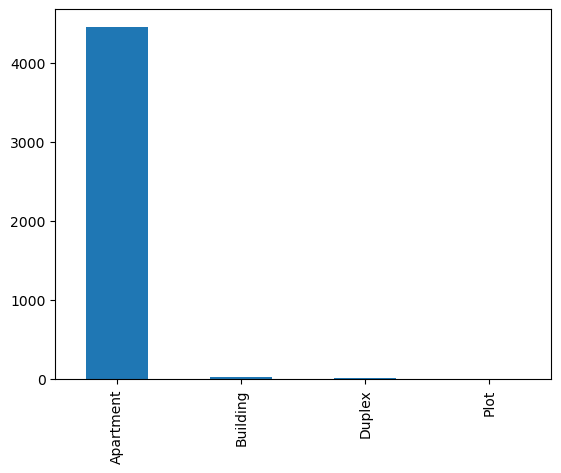

In [10]:
df['Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Type', ylabel='Price'>

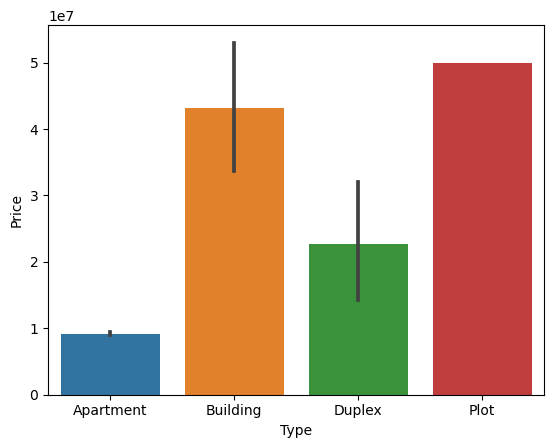

In [11]:
sns.barplot(x=df['Type'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Region'>

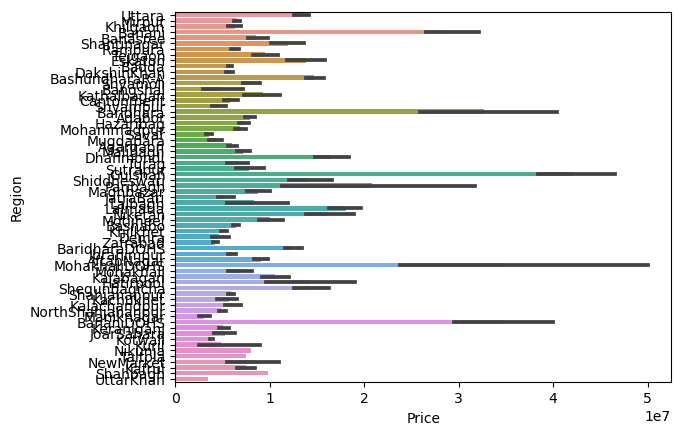

In [12]:
sns.barplot(x=df['Price'],y=df['Region'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4491 entries, 0 to 4703
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4491 non-null   float64
 1   Location    4491 non-null   object 
 2   Price       4491 non-null   int64  
 3   Type        4491 non-null   object 
 4   No. Beds    4491 non-null   float64
 5   No. Baths   4491 non-null   float64
 6   Area        4491 non-null   float64
 7   Latitude    4491 non-null   float64
 8   Longitude   4491 non-null   float64
 9   Region      4491 non-null   object 
 10  Sub-region  4491 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 421.0+ KB


In [14]:
df

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...,...
4699,4747.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4700,4748.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4701,4749.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4702,4750.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur


In [15]:
df.corr()['Price']

Unnamed: 0    0.031774
Price         1.000000
No. Beds      0.431595
No. Baths     0.599182
Area          0.750446
Latitude      0.013232
Longitude     0.100163
Name: Price, dtype: float64

In [16]:
df.drop(columns=['Location'],inplace=True)
df.drop(columns=['Type'],inplace=True)
df.drop(columns=['Region'],inplace=True)
df.drop(columns=['Sub-region'],inplace=True)

In [17]:
df.corr()['Price']

Unnamed: 0    0.031774
Price         1.000000
No. Beds      0.431595
No. Baths     0.599182
Area          0.750446
Latitude      0.013232
Longitude     0.100163
Name: Price, dtype: float64

In [18]:
X= df[['Unnamed: 0','Price','No. Beds','No. Baths','Area','Latitude','Longitude']]
X.head()

,Unnamed: 0,Price,No. Beds,No. Baths,Area,Latitude,Longitude
0,0.0,7500000,3.0,3.0,1300.0,23.86846,90.39280
1,1.0,7280000,4.0,4.0,1456.0,23.81223,90.35967
2,2.0,13000000,3.0,3.0,1550.0,23.75349,90.42469
3,3.0,37000000,3.0,3.0,2669.0,23.78855,90.40081
4,4.0,3600000,2.0,2.0,835.0,23.76354,90.43180


In [19]:
Y= np.where(df['Price'].shift(-1)>df['Price'],1,-1)

In [20]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [21]:
#decisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.59


In [22]:
probability = model.predict_proba(X_test)
print(probability)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [23]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, ...,  1,  1,  1])

In [24]:
from sklearn import metrics

In [25]:
print(metrics.confusion_matrix(Y_test, predicted))

[[527 268]
 [285 268]]


In [26]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.65      0.66      0.66       795
           1       0.50      0.48      0.49       553

    accuracy                           0.59      1348
   macro avg       0.57      0.57      0.57      1348
weighted avg       0.59      0.59      0.59      1348



In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.72
Test_data Accuracy: 0.64


In [29]:
probability = knn.predict_proba(X_test)
print(probability)

[[0.66666667 0.33333333]
 [0.46666667 0.53333333]
 [0.93333333 0.06666667]
 ...
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]]


In [30]:
predicted = knn.predict(X_test)

In [31]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))

[[612 183]
 [306 247]]


In [32]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.67      0.77      0.71       795
           1       0.57      0.45      0.50       553

    accuracy                           0.64      1348
   macro avg       0.62      0.61      0.61      1348
weighted avg       0.63      0.64      0.63      1348



In [33]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
lr = LogisticRegression()
lr = lr.fit (X_train,Y_train)

In [35]:
probability = lr.predict_proba(X_test)
print(probability)

[[0.60017787 0.39982213]
 [0.60119888 0.39880112]
 [0.90723651 0.09276349]
 ...
 [0.59297018 0.40702982]
 [0.59297018 0.40702982]
 [0.59297018 0.40702982]]


In [36]:
accuracy_train = accuracy_score(Y_train, lr.predict(X_train))
accuracy_test = accuracy_score(Y_test, lr.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.59


In [37]:
predic = lr.predict(X_test)
print(metrics.confusion_matrix(Y_test, predic))

[[795   0]
 [553   0]]


In [38]:
print(metrics.classification_report(Y_test, predic))

              precision    recall  f1-score   support

          -1       0.59      1.00      0.74       795
           1       0.00      0.00      0.00       553

    accuracy                           0.59      1348
   macro avg       0.29      0.50      0.37      1348
weighted avg       0.35      0.59      0.44      1348



In [39]:
#RandomForest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
rfc = RandomForestClassifier(n_estimators=16)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [41]:
probability = rfc.predict_proba(X_test)
print(probability)

[[0.6875 0.3125]
 [0.6875 0.3125]
 [0.875  0.125 ]
 ...
 [0.3125 0.6875]
 [0.3125 0.6875]
 [0.3125 0.6875]]


In [42]:
accuracy_train = accuracy_score(Y_train, rfc.predict(X_train))
accuracy_test = accuracy_score(Y_test, rfc.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.98
Test_data Accuracy: 0.62


In [43]:
from sklearn.metrics import confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))

[[524 271]
 [246 307]]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.68      0.66      0.67       795
           1       0.53      0.56      0.54       553

    accuracy                           0.62      1348
   macro avg       0.61      0.61      0.61      1348
weighted avg       0.62      0.62      0.62      1348



In [45]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [46]:
#Initializing the MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(600,300,150), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(600, 300, 150), max_iter=300, random_state=1)

In [47]:
accuracy_Train = accuracy_score(Y_train, mlp.predict(X_train))
accuracy_Test = accuracy_score(Y_test, mlp.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.59


In [48]:
from sklearn.metrics import confusion_matrix
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(Y_test, mlp_pred))

[[795   0]
 [553   0]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, mlp_pred))

              precision    recall  f1-score   support

          -1       0.59      1.00      0.74       795
           1       0.00      0.00      0.00       553

    accuracy                           0.59      1348
   macro avg       0.29      0.50      0.37      1348
weighted avg       0.35      0.59      0.44      1348



In [50]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB()

In [51]:
accuracy_Train = accuracy_score(Y_train, gb.predict(X_train))
accuracy_Test = accuracy_score(Y_test, gb.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.55
Test_data Accuracy: 0.55


In [52]:
from sklearn.metrics import confusion_matrix
gb_pred = gb.predict(X_test)
print(confusion_matrix(Y_test, gb_pred))

[[237 558]
 [ 50 503]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

          -1       0.83      0.30      0.44       795
           1       0.47      0.91      0.62       553

    accuracy                           0.55      1348
   macro avg       0.65      0.60      0.53      1348
weighted avg       0.68      0.55      0.51      1348



In [54]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sv=SVC()
sv.fit(X_train,Y_train)

SVC()

In [55]:
# accuracy score, confusion matrix and classification report of knn

sv_acc = accuracy_score(Y_test, sv.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(Y_train, sv.predict(X_train))}")
print(f"Test Accuracy of SVM is {sv_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, sv.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, sv.predict(X_test))}")

Training Accuracy of SVM is 0.6621062678969137
Test Accuracy of SVM is 0.6468842729970327 

Confusion Matrix :- 
[[654 141]
 [335 218]]

Classification Report :- 
               precision    recall  f1-score   support

          -1       0.66      0.82      0.73       795
           1       0.61      0.39      0.48       553

    accuracy                           0.65      1348
   macro avg       0.63      0.61      0.61      1348
weighted avg       0.64      0.65      0.63      1348

